<a href="https://colab.research.google.com/github/Arpita2512/Analytics_Olympiad_2021/blob/main/Phase_3_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive Connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/analytics olympiad phase 2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [ ]:
import numpy as np
seed = 0
np.random.seed(seed)

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,Item_ID,Item_W,Item_FC,Item_Vis,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales
0,FDU32,21.027499,Regular,0.181327,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,Supermarket Type1,2689.457781
1,NCT54,21.102371,Low Fat,0.185984,Meat,148.250214,OUT035,1987,Small,Tier 1,Supermarket Type1,3437.350375
2,FDW08,20.882263,Low Fat,0.063056,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,Supermarket Type1,3129.967268
3,FDJ22,21.050435,Low Fat,0.080088,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,Supermarket Type1,1306.514376
4,FDF47,21.247876,LF,0.070085,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,Supermarket Type1,1739.769829


In [ ]:
train.shape

(87864, 12)

In [ ]:
for col in train:
  print(col, train[col].nunique(), '\n')

Item_ID 895 

Item_W 87283 

Item_FC 5 

Item_Vis 87826 

Item_Type 16 

Item_MRP 87814 

Outlet_ID 5 

Outlet_Year 12 

Outlet_Size 3 

Outlet_Location_Type 3 

Outlet_Type 2 

Sales 87760 



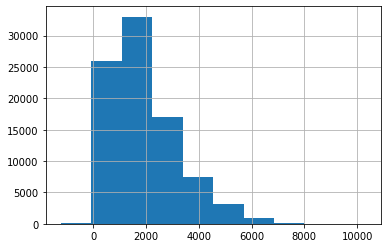

In [ ]:
train['Sales'].hist()
plt.savefig('sales.png', dpi=600, bbox_inches='tight')

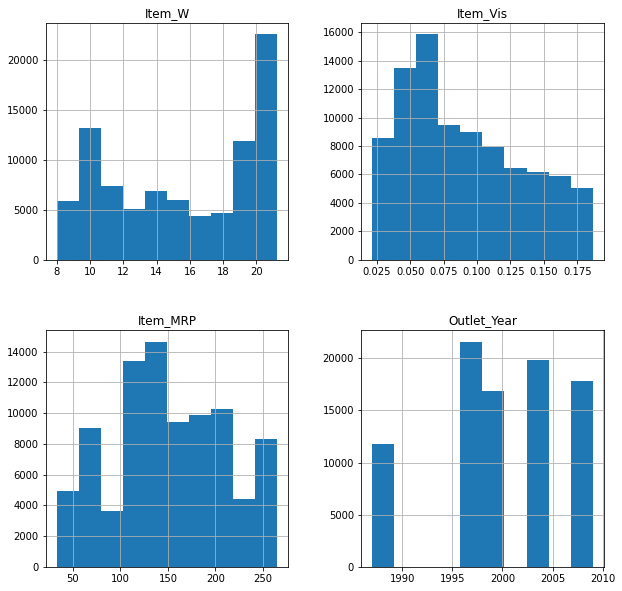

In [ ]:
import matplotlib.pyplot as plt

train.drop(columns=['Sales']).hist(figsize=(10,10))
plt.savefig('num_vars.png', dpi=600, bbox_inches='tight')

In [ ]:
pd.DataFrame({
    'Outlet_ID Values': train['Outlet_ID'].value_counts().index,
    'Count': train['Outlet_ID'].value_counts().values
})

,Outlet_ID Values,Count
0,OUT035,24071
1,OUT046,20850
2,OUT018,17156
3,OUT049,13356
4,OUT013,12431


In [ ]:
pd.DataFrame({
    'Item_Type Values': train['Item_Type'].value_counts().index,
    'Count': train['Item_Type'].value_counts().values
})

,Item_Type Values,Count
0,Baking Goods,14666
1,Fruits and Vegetables,14328
2,Meat,8099
3,Snack Foods,7817
4,Household,6018
5,Soft Drinks,5396
6,Frozen Foods,5129
7,Canned,4565
8,Dairy,3807
9,Others,3688


In [ ]:
pd.DataFrame({
    'Outlet_Size Values': train['Outlet_Size'].value_counts().index,
    'Count': train['Outlet_Size'].value_counts().values
})

,Outlet_Size Values,Count
0,Small,48614
1,Medium,26683
2,High,12567


In [ ]:
pd.DataFrame({
    'Outlet_Location_Type Values': train['Outlet_Location_Type'].value_counts().index,
    'Count': train['Outlet_Location_Type'].value_counts().values
})


,Outlet_Location_Type Values,Count
0,Tier 1,33567
1,Tier 3,29044
2,Tier 2,25253


In [ ]:
pd.DataFrame({
    'Outlet_Type Values': train['Outlet_Type'].value_counts().index,
    'Count': train['Outlet_Type'].value_counts().values
})


,Outlet_Type Values,Count
0,Supermarket Type1,71621
1,Supermarket Type2,16243


In [ ]:
pd.DataFrame({
    'Item_FC Values': train['Item_FC'].value_counts().index,
    'Count': train['Item_FC'].value_counts().values
})


,Item_FC Values,Count
0,Low Fat,46761
1,Regular,32214
2,LF,5858
3,low fat,2098
4,reg,933


In [ ]:
train.isnull().sum()

Item_ID                 0
Item_W                  0
Item_FC                 0
Item_Vis                0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Sales                   0
dtype: int64

In [ ]:
train.dtypes

Item_ID                  object
Item_W                  float64
Item_FC                  object
Item_Vis                float64
Item_Type                object
Item_MRP                float64
Outlet_ID                object
Outlet_Year               int64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Sales                   float64
dtype: object

# Preprocess Data

In [ ]:
numerical_cols = [
             'Item_MRP', 'Outlet_Year' 
]
# 'Item_W', 'Item_Vis', 

In [ ]:
categorical_cols = [
                    'Item_Type', 'Outlet_ID', 'Item_FC', 'Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type'
]
# 'Item_ID', 

In [ ]:
# no null values so no imputation required

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

# define preprocessing steps

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split Data

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=10, shuffle=True, random_state=seed)

In [ ]:
X = train[numerical_cols+categorical_cols]
Y = train['Sales']

# Build & Evaluate Model

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [ ]:
import sklearn
sklearn.__version__

'1.0.1'

In [ ]:
from catboost import CatBoostRegressor

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', CatBoostRegressor(iterations=500, learning_rate=0.04, random_state=0, verbose=False))
                             ])

In [ ]:
from sklearn import set_config

set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Item_MRP', 'Outlet_Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Item_Type', 'Outlet_ID',
                                                   'Item_FC', 'Outlet_Type',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7fa787cea5d0>)])

In [ ]:
total = 0
i = 0
for train_idx, test_idx in kf.split(X):
  X_train, Y_train = X.iloc[train_idx], Y.iloc[train_idx]
  X_test, Y_test = X.iloc[test_idx], Y.iloc[test_idx]

  pipeline.fit(X_train, Y_train)
  y_pred = pipeline.predict(X_test)
  print("\n Fold " + str(i) + " RMSE: ", mean_squared_error(Y_test, y_pred, squared=False))
  total += mean_squared_error(Y_test, y_pred, squared=False)
  i += 1

print('\n Average RMSE: ', total/10)


 Fold 0 RMSE:  1271.6469883121435

 Fold 1 RMSE:  1269.7460058259733

 Fold 2 RMSE:  1269.540823160822

 Fold 3 RMSE:  1270.631445824456

 Fold 4 RMSE:  1263.9201114672865

 Fold 5 RMSE:  1273.8158401503713

 Fold 6 RMSE:  1271.5772724979722

 Fold 7 RMSE:  1288.443992726281

 Fold 8 RMSE:  1274.7788468146039

 Fold 9 RMSE:  1275.833250837431

 Average RMSE:  1272.9934577617341


# Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(pipeline, X_test, Y_test,
                                random_state=0)

In [ ]:
pd.DataFrame({'cols': X.columns, "scores": result['importances_mean']})

,cols,scores
0,Item_MRP,0.002222
1,Outlet_Year,0.018928
2,Item_Type,0.003635
3,Outlet_ID,0.007938
4,Item_FC,0.002733
5,Outlet_Type,0.003994
6,Outlet_Size,0.002587
7,Outlet_Location_Type,0.002807


# Total Training RMSE

In [ ]:
pipeline.fit(X, Y)
y_pred = pipeline.predict(X)
print(mean_squared_error(Y, y_pred, squared=False))

1260.2409702116436


# XAI

In [ ]:
!pip install shap

In [ ]:
new_feature_names = pipeline['preprocessor'].get_feature_names_out()

In [ ]:
new_feature_names

array(['num__Item_MRP', 'num__Outlet_Year', 'cat__Item_Type_Baking Goods',
       'cat__Item_Type_Breads', 'cat__Item_Type_Breakfast',
       'cat__Item_Type_Canned', 'cat__Item_Type_Dairy',
       'cat__Item_Type_Frozen Foods',
       'cat__Item_Type_Fruits and Vegetables',
       'cat__Item_Type_Hard Drinks', 'cat__Item_Type_Health and Hygiene',
       'cat__Item_Type_Household', 'cat__Item_Type_Meat',
       'cat__Item_Type_Others', 'cat__Item_Type_Seafood',
       'cat__Item_Type_Snack Foods', 'cat__Item_Type_Soft Drinks',
       'cat__Item_Type_Starchy Foods', 'cat__Outlet_ID_OUT013',
       'cat__Outlet_ID_OUT018', 'cat__Outlet_ID_OUT035',
       'cat__Outlet_ID_OUT046', 'cat__Outlet_ID_OUT049',
       'cat__Item_FC_LF', 'cat__Item_FC_Low Fat', 'cat__Item_FC_Regular',
       'cat__Item_FC_low fat', 'cat__Item_FC_reg',
       'cat__Outlet_Type_Supermarket Type1',
       'cat__Outlet_Type_Supermarket Type2', 'cat__Outlet_Size_High',
       'cat__Outlet_Size_Medium', 'cat__Outlet_Si

In [ ]:
import shap

shap.initjs() 

explainer = shap.Explainer(pipeline['model'], feature_names=new_feature_names)
observations = pipeline['preprocessor'].transform(X)

In [ ]:
shap_values = explainer(observations)

In [ ]:
import matplotlib.pyplot as plt

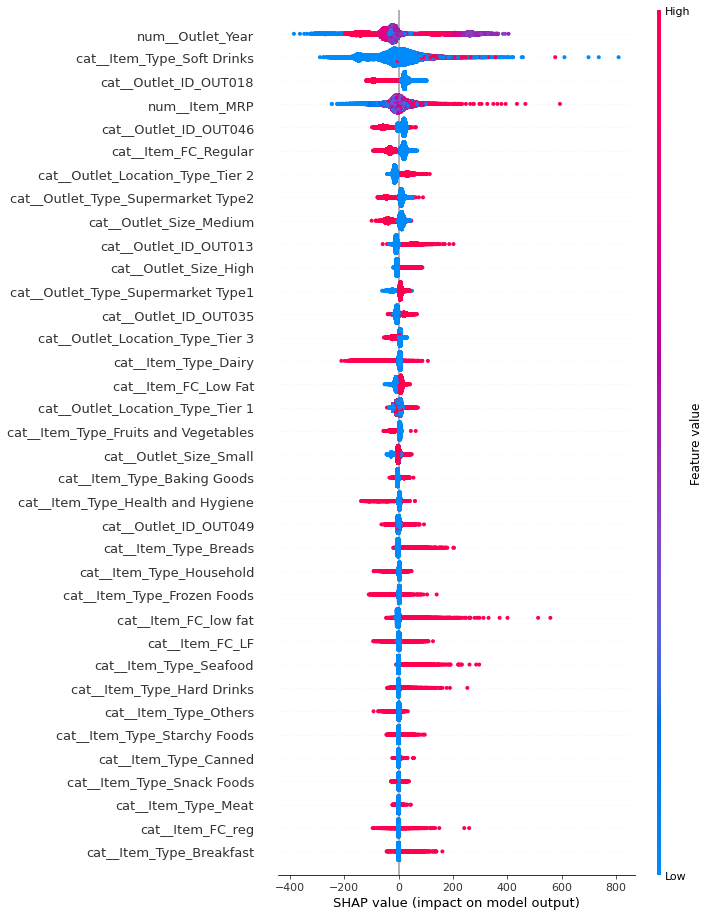

In [ ]:
shap.plots.beeswarm(shap_values, max_display=50, show=False, )
plt.savefig('shap_beeswarm.png', dpi=600, bbox_inches='tight')
plt.show()

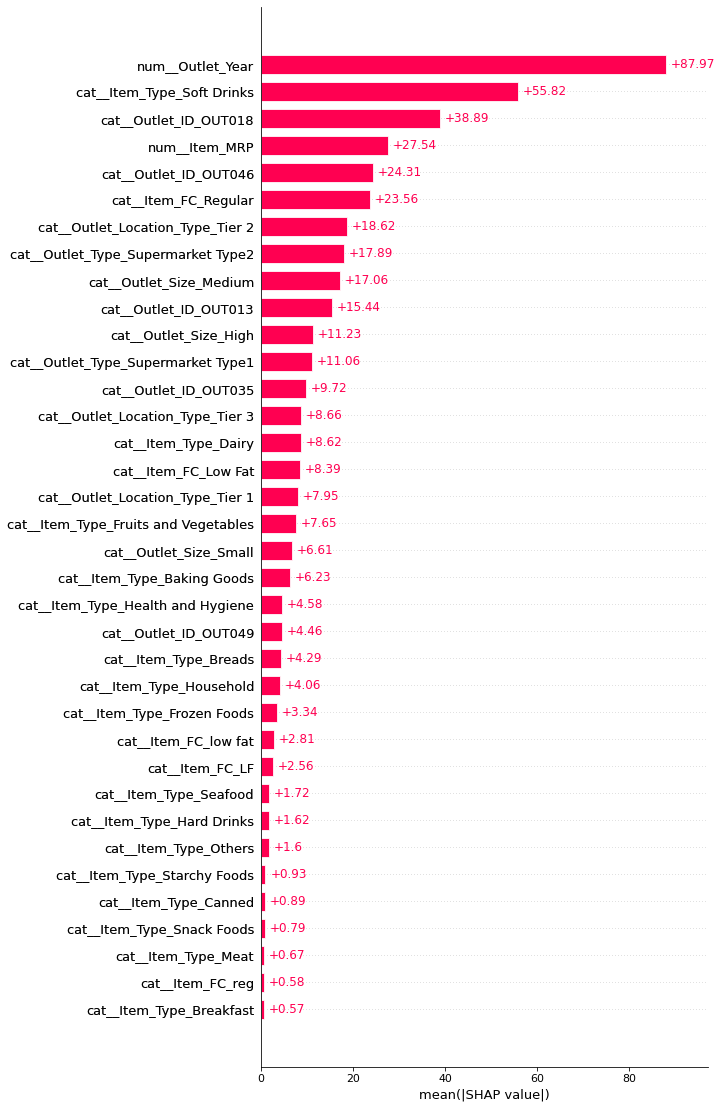

In [ ]:
shap.plots.bar(shap_values, max_display=50, show=False)
plt.savefig('shap_bar.png', dpi=600, bbox_inches='tight')
plt.show()

# Predictions

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,Item_ID,Item_W,Item_FC,Item_Vis,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales
0,DRM23,10.156725,Low Fat,0.051905,Snack Foods,119.319482,OUT013,1999,High,Tier 3,Supermarket Type1,NaN
1,FDG47,10.434425,Low Fat,0.107947,Household,263.600449,OUT018,1987,High,Tier 3,Supermarket Type1,NaN
2,FDN21,11.953589,Low Fat,0.139692,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1,Supermarket Type1,NaN
3,FDZ23,14.948546,Low Fat,0.111617,Dairy,136.200508,OUT046,2004,Medium,Tier 2,Supermarket Type1,NaN
4,FDC16,11.080042,Low Fat,0.139869,Canned,173.145664,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN


In [ ]:
# store predictions as dataframe

submission = pd.DataFrame(pipeline.predict(test[categorical_cols+numerical_cols]))
submission.index = test.index
submission.columns = ['Sales']
submission.head()

,Sales
0,2085.992062
1,1922.605485
2,1805.700823
3,1727.522418
4,1434.781059


In [ ]:
submission.to_csv('submission.csv', index=False)